In [26]:
# sklearn dataset : https://scikit-learn.org/stable/datasets/index.html

from sklearn.datasets import load_iris

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve, fbeta_score

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold, StratifiedKFold


In [15]:
dataset = load_iris()
print(dataset.keys()) 
#dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

print(dataset.feature_names)    #X컬럼이름
print(dataset.data[:5])         #X값

print(dataset.target_names)
print(dataset.target)      #y값

# print(dataset.DESCR)

#sepal length (cm)  sepal width (cm)  ...  petal width (cm)


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
['setosa' 'versicolor' 'virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [3]:
df = pd.DataFrame(data=dataset.data,
                  #columns=dataset.feature_names
                  columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
                  )
df["target"] = dataset.target
print(df.head())
print(df.info())
print(df.shape)

   sepal_length  sepal_width  petal_length  petal_width  target
0           5.1          3.5           1.4          0.2       0
1           4.9          3.0           1.4          0.2       0
2           4.7          3.2           1.3          0.2       0
3           4.6          3.1           1.5          0.2       0
4           5.0          3.6           1.4          0.2       0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   target        150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB
None
(150, 5)


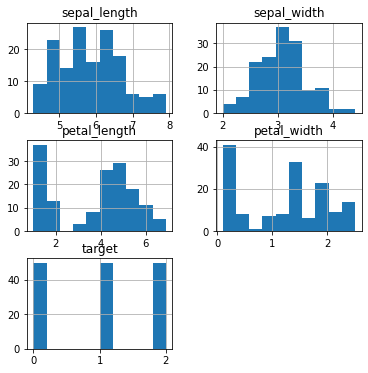

In [8]:
df.hist(figsize=(6,6))
plt.show()


In [9]:
df["target"].value_counts()

2    50
1    50
0    50
Name: target, dtype: int64

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'target'], dtype='object')


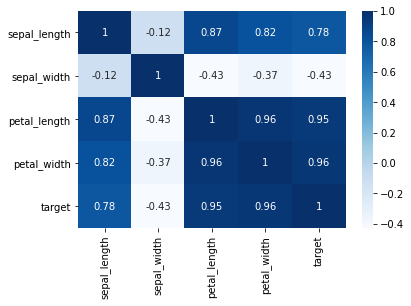

In [60]:
#------------ 결측X, 수치형 : 분석데이터
#분석 -------- 상관분석 : 피쳐관계
#---------------------: 일반피쳐:다중공선 타켓피쳐:상관도
print(df.columns)
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.show()


target : 'sepal_width'빼고 ['sepal_length', 'petal_length', 'petal_width', 'target'] <br>
다중공선 : 'petal_length', 'petal_width'

## 모델 선정/평가

In [12]:
X = df.iloc[: , :-1]
y = df.iloc[: , -1]
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=160)
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
pred = rf.predict(X_test)
print("전처리 전 우선 점수부터 확인------\n")
report = classification_report(y_test, pred)
print(report)


전처리 전 우선 점수부터 확인------

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.86      1.00      0.92         6
           2       1.00      0.92      0.96        12

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [14]:
scaler = StandardScaler()
X_scaler = scaler.fit_transform(X)
X_train,X_test,y_train,y_test = train_test_split(X_scaler, y, test_size=0.2, random_state=160)
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
pred = rf.predict(X_test)
print("정규화 후 점수 확인------\n")
report = classification_report(y_test, pred)
print(report)

정규화 후 점수 확인------

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.86      1.00      0.92         6
           2       1.00      0.92      0.96        12

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [55]:
# KFold, StratifiedKFold
score_list = []
kfold = KFold(n_splits=3, random_state=11)
for k, (train_idx, test_idx) in enumerate(kfold.split(X_scaler)):
    X_train, X_test = X_scaler[train_idx], X_scaler[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    print(k, len(y_test), test_idx)

    rf = RandomForestClassifier()
    rf.fit(X_train, y_train)
    pred = rf.predict(X_test)

    #분류의 모든 score는 average='binary'(default)
    #멀티클래스분류인 경우 : 'micro', 'macro', 'samples','weighted'
    f1 = f1_score(y_test, pred, average='macro')
    score_list.append(f1)
    print(k, "F1:", f1)
print("Kfold-cv3 F1:평균점수:", np.mean(score_list))


0 50 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]
0 F1: 0.0
1 50 [50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73
 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97
 98 99]
1 F1: 0.0
2 50 [100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]
2 F1: 0.0
Kfold-cv3 F1:평균점수: 0.0


## StratifiedKFold

In [56]:
score_list = []
skfold = StratifiedKFold(n_splits=3, random_state=11)
#---- kFold와는 달리 문제지(x),답안지(y)까지 같이 주고 split
for k, (train_idx, test_idx) in enumerate(skfold.split(X_scaler, y)):
    X_train, X_test = X_scaler[train_idx], X_scaler[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    print(k, len(y_test), test_idx)
   
    rf = RandomForestClassifier()
    rf.fit(X_train, y_train)
    pred = rf.predict(X_test)

    #분류의 모든 score는 average='binary'(default)
    #멀티클래스분류인 경우 : 'micro', 'macro', 'samples','weighted'
    f1 = f1_score(y_test, pred, average='macro')
    score_list.append(f1)
    print(k, "F1:", f1)
print("StratifiedKFold-cv3 F1:평균점수:", np.mean(score_list))


0 50 [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115]
0 F1: 0.9797235023041475
1 50 [ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132]
1 F1: 0.9391705069124424
2 50 [ 34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]
2 F1: 0.9607843137254902
StratifiedKFold-cv3 F1:평균점수: 0.9598927743140268


## Pipeline = Scaler + PCA 
* 정규화 사용 이후 사용 : 최대분산(수치,스케일에 민감)

In [69]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

scaler = StandardScaler()
pca = PCA(n_components=2)
pipeline = make_pipeline(scaler, pca)
pca_res = pipeline.fit_transform(X)

# pca = PCA()
# res = pca.fit_transform(X_scaler)
print(pca_res.shape)
print("주성분(PC) 2개가 전체 데이터를 얼마나 설명할수 있는가?\n", np.sum(pca.explained_variance_ratio_), pca.explained_variance_ratio_)

(150, 2)
주성분(PC) 2개가 전체 데이터를 얼마나 설명할수 있는가?
 0.9581320720000164 [0.72962445 0.22850762]


In [64]:
pca_df = pd.DataFrame(data=pca_res
                      , columns=["pc1", "pc2"])
pca_df["target"] = y
pca_df.head()

,pc1,pc2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0


In [65]:
model = RandomForestClassifier()
score_list = cross_val_score(model, pca_df[["pc1","pc2"]], pca_df["target"] , cv=3, scoring='f1_macro',verbose=0)
print(score_list)
print("cross_val_score-cv5 F1:평균점수:", np.mean(score_list))

[0.87867647 0.87777778 0.88070175]
cross_val_score-cv5 F1:평균점수: 0.879052000917326


## cross_val_score
* 내부적 cv(폴드)는 StratifiedKFold 전략을 따른다.(같은 점수를 낸다)
* 각 폴드마다 taget의 값들이 편중되지않게 들어가게 한다

In [57]:
model = RandomForestClassifier()
score_list = cross_val_score(model, X_scaler, y , cv=3, scoring='f1_macro',verbose=0)
print(score_list)
print("cross_val_score-cv5 F1:평균점수:", np.mean(score_list))

[0.9797235  0.93917051 0.96078431]
cross_val_score-cv5 F1:평균점수: 0.9598927743140268


## GridSearchCV(cv = 튜닝)

In [59]:
#cross_val_score +  param_grid(튜닝) / refit=True(best모델반영)
model = RandomForestClassifier()
myparam = {'max_depth':[1,3,5,7], 'min_samples_split':[1,2,3]}
GCV_model = GridSearchCV(model, param_grid=myparam, refit=True, cv=5, scoring='f1_macro',verbose=0)
GCV_model.fit(X_train, y_train)

#max_depth 4번 * min_samples_split 3번 * cv=5  = 총 60번 학습
print(GCV_model.best_score_)
print(GCV_model.best_estimator_)
print(GCV_model.best_params_)

0.9592873792873793
RandomForestClassifier(max_depth=3)
{'max_depth': 3, 'min_samples_split': 2}


In [54]:
# model = RandomForestClassifier(max_depth=5, min_samples_split=2)
# model.predict(X_test)

# refit=True 속성때문에 GCV_model에 최적 파라미터가 모두 반영된 상태다
pred = GCV_model.predict(X_test)
f1 = f1_score(y_test, pred, average='macro')
print("GridSearchCV 최종 예측 점수:", f1)

GridSearchCV 최종 예측 점수: 1.0
